<a href="https://colab.research.google.com/github/ashraf-abdalghani/mycolab/blob/main/Netflix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# استدعاء المكتبات

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# تحميل البيانات

In [2]:
netflix_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv"

df = pd.read_csv(netflix_url)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
round(df.describe())

,release_year
count,7787.0
mean,2014.0
std,9.0
min,1925.0
25%,2013.0
50%,2017.0
75%,2018.0
max,2021.0


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


<Axes: >

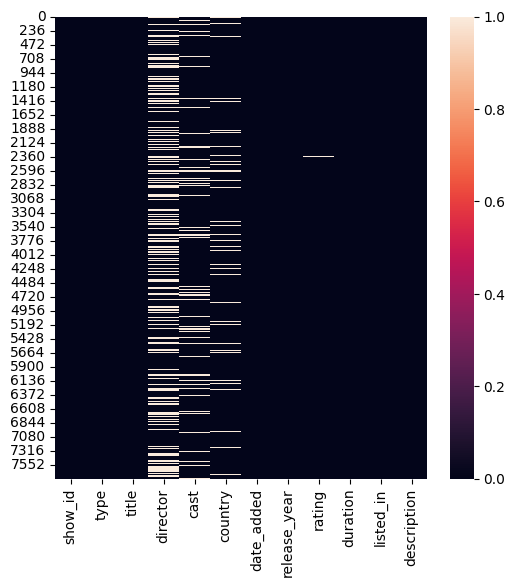

In [7]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isna())

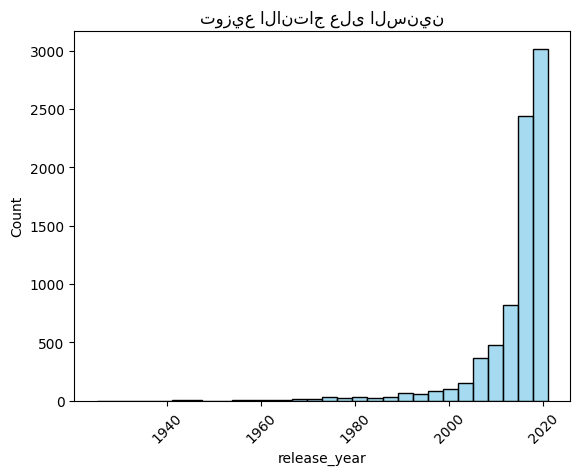

In [8]:
sns.histplot(df['release_year'],bins=30,kde=False, color='skyblue')
plt.xlabel=('release year')
plt.ylabel=('count')
plt.title('توزيع الانتاج على السنين')
plt.xticks(rotation=45)
plt.show()

listed_in
International Movies            2437
Dramas                          2106
Comedies                        1471
International TV Shows          1199
Documentaries                    786
Action & Adventure               721
TV Dramas                        704
Independent Movies               673
Children & Family Movies         532
Romantic Movies                  531
TV Comedies                      525
Thrillers                        491
Crime TV Shows                   427
Kids' TV                         414
Docuseries                       353
Romantic TV Shows                333
Stand-Up Comedy                  329
Music & Musicals                 321
Horror Movies                    312
British TV Shows                 232
Reality TV                       222
Sci-Fi & Fantasy                 218
Sports Movies                    196
Korean TV Shows                  150
TV Action & Adventure            150
Anime Series                     148
Spanish-Language TV Shows   

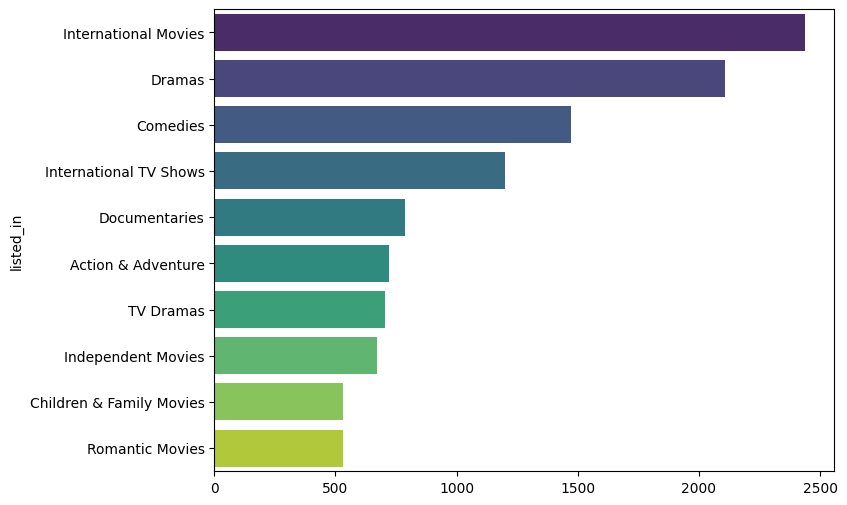

In [9]:
# تقسيم الأنماط (ممكن أن يكون للعنصر أكثر من نمط)
genres = df['listed_in'].str.split(', ').explode()
print(genres.value_counts())
print('=' * 10)

# حساب أكثر 10 أنماط شيوعًا
top_genres = genres.value_counts().head(10)

# رسم بياني
plt.figure(figsize=(8, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
# plt.title("أكثر 10 أنماط شيوعًا على Netflix")
# plt.xlabel("العدد")
# plt.ylabel("النمط")
plt.xlabel = 'العدد'
plt.ylabel='النمط'
plt.title='أكثر 10 أنماط شيوعًا على Netflix'
plt.show()

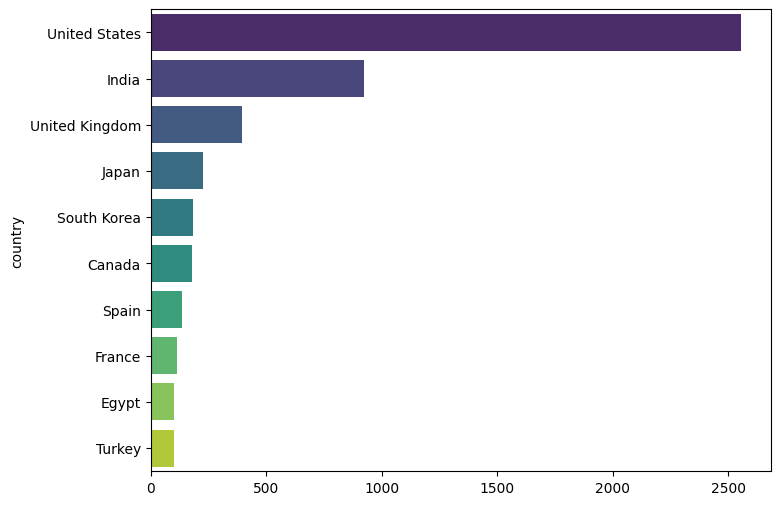

In [10]:
Top_Country = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=Top_Country.values, y=Top_Country.index, palette='viridis')
plt.xlabel="العدد"
plt.show()

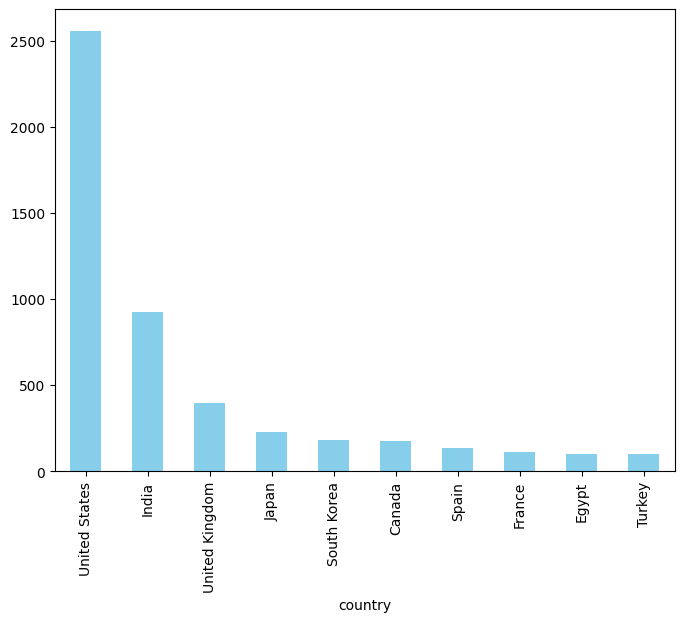

In [24]:
df['country'].value_counts().head(10).plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.xlabel='البلدان'
plt.ylabel='العدد'
plt.show()

In [11]:
df['country'].value_counts().sort_values(ascending=False).head(10)

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101


In [26]:
egypt_Film = df.loc[df['country'] == 'Egypt']
egypt_Film.to_excel('netflix_titles.xlsx', index=False)

# تحليل المدة (للأفلام فقط)

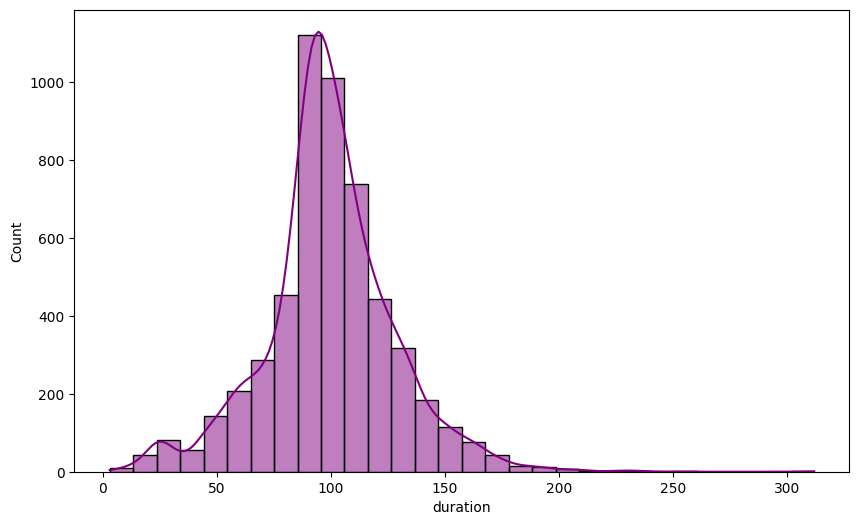

In [13]:
# فلترة الأفلام فقط
movies = df[df['type'] == 'Movie']

# تحويل المدة إلى أرقام
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)

# رسم توزيع المدة
plt.figure(figsize=(10, 6))
sns.histplot(movies['duration'], bins=30, kde=True, color='purple')
plt.title = "توزيع مدة الأفلام (بالدقائق)"
plt.xlabel="المدة (دقيقة)"
plt.ylabel="العدد"
plt.show()

# تحليل التصنيف العمري (Rating):

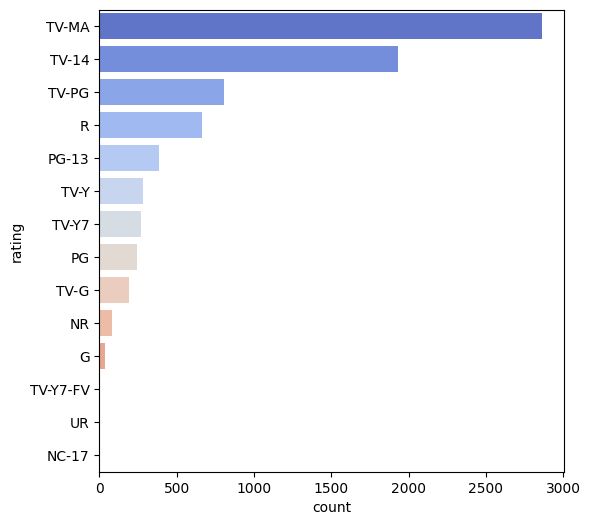

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(y=df.rating,data=df,order=df['rating'].value_counts().index,palette='coolwarm')
plt.title='التصنيف العمري (Rating)'
plt.xlabel='العدد'
plt.ylabel='التصنيف'
plt.show()


# : تحليل المسلسلات حسب عدد المواسم

In [15]:
tv_shows = df[df['type'] == 'TV Show' ]

